In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [34]:
data = pd.read_csv('HR_analytics.csv', sep='|')
data

,ID,Mosha,Udhetime_biznesore,Departamenti,Distanca_nga_shtepija,Fusha_edukimit,Ambientimi_punetorit,Gjinia,Involvimi_ne_detyra_pergjegjesi,Niveli_punes,...,OverTime,Ngritja_rroges_perqindje,Vite_pervoje_pune,Numri_trajnimeve_vitin_kaluar,Bilanci_pune_jete,Vitet_me_kompanine,Vitet_ne_rolin_aktual,Vitet_qe_nga_ngritja_pozites,Vitet_me_menagjerin_aktual,Largimi
0,1,41,Travel_Rarely,Sales,1,Life Sciences,2,Female,3,2,...,Yes,11,8,0,1,6,4,0,5,Yes
1,2,49,Travel_Frequently,Research & Development,8,Life Sciences,3,Male,2,2,...,No,23,10,3,3,10,7,1,7,No
2,3,37,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,...,Yes,15,7,3,3,0,0,0,0,Yes
3,4,33,Travel_Frequently,Research & Development,3,Life Sciences,4,Female,3,1,...,Yes,11,8,3,3,8,7,3,0,No
4,5,27,Travel_Rarely,Research & Development,2,Medical,1,Male,3,1,...,No,12,6,3,3,2,2,2,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,Travel_Frequently,Research & Development,23,Medical,3,Male,4,2,...,No,17,17,3,3,5,2,0,3,No
1466,1467,39,Travel_Rarely,Research & Development,6,Medical,4,Male,2,3,...,No,15,9,5,3,7,7,1,7,No
1467,1468,27,Travel_Rarely,Research & Development,4,Life Sciences,2,Male,4,2,...,Yes,20,6,0,3,6,2,0,3,No
1468,1469,49,Travel_Frequently,Sales,2,Medical,4,Male,2,2,...,No,14,17,3,2,9,6,0,8,No


In [20]:
data.describe()

,ID,Mosha,Udhetime_biznesore,Departamenti,Distanca_nga_shtepija,Fusha_edukimit,Ambientimi_punetorit,Gjinia,Involvimi_ne_detyra_pergjegjesi,Niveli_punes,...,OverTime,Ngritja_rroges_perqindje,Vite_pervoje_pune,Numri_trajnimeve_vitin_kaluar,Bilanci_pune_jete,Vitet_me_kompanine,Vitet_ne_rolin_aktual,Vitet_qe_nga_ngritja_pozites,Vitet_me_menagjerin_aktual,Largimi
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,1.607483,1.260544,9.192517,2.247619,2.721769,0.600000,2.729932,2.063946,...,0.282993,15.209524,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,424.496761,9.135373,0.665455,0.527792,8.106864,1.331369,1.093082,0.490065,0.711561,1.106940,...,0.450606,3.659938,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,1.000000,18.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,11.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,2.000000,1.000000,...,0.000000,12.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,735.500000,36.000000,2.000000,1.000000,7.000000,2.000000,3.000000,1.000000,3.000000,2.000000,...,0.000000,14.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1102.750000,43.000000,2.000000,2.000000,14.000000,3.000000,4.000000,1.000000,3.000000,3.000000,...,1.000000,18.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,1470.000000,60.000000,2.000000,2.000000,29.000000,5.000000,4.000000,1.000000,4.000000,5.000000,...,1.000000,25.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


In [35]:
data.isnull().sum()

ID                                 0
Mosha                              0
Udhetime_biznesore                 0
Departamenti                       0
Distanca_nga_shtepija              0
Fusha_edukimit                     0
Ambientimi_punetorit               0
Gjinia                             0
Involvimi_ne_detyra_pergjegjesi    0
Niveli_punes                       0
Roli                               0
Satisfaksioni_punedhenesit         0
Statusi_martesor                   0
Ardhurat_mujore                    0
Numri_kompanive_qe_kapunuar        0
OverTime                           0
Ngritja_rroges_perqindje           0
Vite_pervoje_pune                  0
Numri_trajnimeve_vitin_kaluar      0
Bilanci_pune_jete                  0
Vitet_me_kompanine                 0
Vitet_ne_rolin_aktual              0
Vitet_qe_nga_ngritja_pozites       0
Vitet_me_menagjerin_aktual         0
Largimi                            0
dtype: int64

In [36]:
data['Departamenti'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

#### Find the factors that indicate employees leaving the company.


In [37]:
# Encode categorical variables that needs to be encoded from all the columns in dataset
label_encoders = {}
for column in ['Gjinia', 'Fusha_edukimit', 'Departamenti', 'Udhetime_biznesore', 'Roli', 'Statusi_martesor', 'OverTime', 'Largimi']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [38]:
# Features and target
# in this case feature is ID of employee and target is to find the leaving status
X = data.drop(['ID', 'Largimi'], axis=1)
y = data['Largimi']

In [39]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [40]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Model training with XGBoost
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1]))

# Hyperparameter tuning (optional, using GridSearchCV)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc')

In [41]:
# Best model
best_xgb_model = grid_search.best_estimator_

In [42]:
# Predictions and evaluation
y_pred = best_xgb_model.predict(X_test)
y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]

In [43]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       247
           1       0.50      0.34      0.41        47

    accuracy                           0.84       294
   macro avg       0.69      0.64      0.66       294
weighted avg       0.82      0.84      0.83       294

ROC-AUC Score: 0.7733654922904643


Accuracy of this model is not that bad 84%. Data is clean and not very heavely imbalanced, however a little bit yes. We did use Gradient Boosting which is a strong machine learning algorithm that handles imbalances of dataset, however one must encode the features as we did above.

In [44]:
# lets see the overall classification performance
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[231  16]
 [ 31  16]]


In [45]:
# Assuming best_xgb_model is the trained model
# Extract feature importances in a dataframe so can plot it easier and better when implementing visualization
importance_dict = best_xgb_model.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Importance': list(importance_dict.values())
})


In [47]:
# important
# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

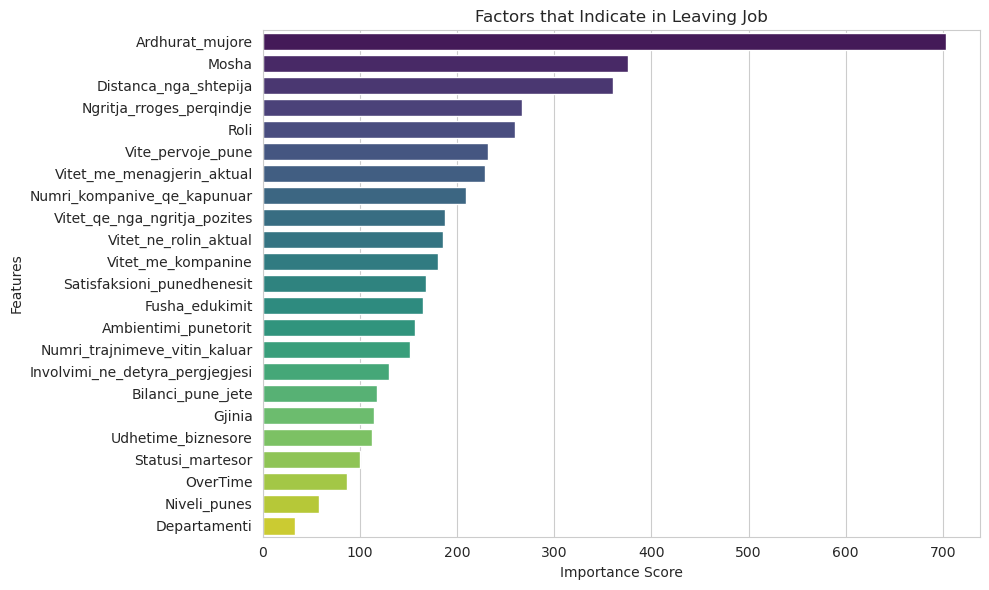

In [49]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')

# Set plot title and labels
plt.title('Factors that Indicate in Leaving Job')
plt.xlabel('Importance Score')
plt.ylabel('Features')

# Adjust the plot layout
plt.tight_layout()
plt.savefig("Factors that indicate in leaving job.png", format='png')

# Show the plot
plt.show()

Among all the factors we identified as influencing the decision to leave a job, the primary reason is dissatisfaction with salary or income. According to our dataset, 700 individuals cited salary dissatisfaction as their reason for leaving their jobs. Two other significant factors contributing to job turnover are age and the distance between home and office. These findings highlight the importance of flexibility, a critical aspect that companies must prioritize to retain their employees.